In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("TRAIN.csv")
test_df = pd.read_csv("TEST.csv")

In [3]:
print(len(list(train_df.columns)))
train_df.columns

16


Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [4]:
print(len(list(test_df.columns)))
test_df.columns

15


Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2'],
      dtype='object')

In [5]:
print(train_df.shape)
test_df.shape

(1400, 16)


(600, 15)

In [6]:
## notice the "Most 'Most Loved Competitor network in in Month 1" and 'Most Loved Competitor network in in Month 2"
## i will remove one "in"

new_column_names = {"Most Loved Competitor network in in Month 1": "Most Loved Competitor network in Month 1",
                    "Most Loved Competitor network in in Month 2": "Most Loved Competitor network in Month 2"}

train_df.rename(columns=new_column_names, inplace=True)
test_df.rename(columns=new_column_names, inplace=True)

In [7]:
## dataframes named with spaces irks me. i suppose its from it not looking like proper variables in classical programmming.
## i will rename name here

train_df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
test_df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [8]:
#engineering some features

## categorical features
train_df['Consistent_competitor'] = np.where(
    train_df['Most_Loved_Competitor_network_in_Month_1'] == train_df['Most_Loved_Competitor_network_in_Month_2'],
    'yes',
    'no'
)

train_df['Network_Upgrade'] = "same"

train_df.loc[(train_df['Network_type_subscription_in_Month_1'] == '2G') &
              (train_df['Network_type_subscription_in_Month_2'] == '3G'), 'Network_Upgrade'] = "upgrade"

train_df.loc[(train_df['Network_type_subscription_in_Month_1'] == '3G') &
              (train_df['Network_type_subscription_in_Month_2'] == '2G'), 'Network_Upgrade'] = "downgrade"

# will enginner two numerical features. to ensure numerical stability i will add a small number, and use the log:
small_number =  0.01
Offnet_Over_Onnet= list(np.log(train_df['Total_Offnet_spend'] +small_number)/ np.log(train_df['Total_Onnet_spend_'] + small_number))
SMS_Over_Data = list(np.log(train_df['Total_SMS_Spend'] + small_number) /np.log(train_df['Total_Data_Spend'] + small_number))

ls_of_cols = list(train_df.columns)
idx = ls_of_cols.index('Total_Call_centre_complaint_calls')

train_df.insert(idx, "Offnet_Over_Onnet" , Offnet_Over_Onnet)
train_df.insert(idx, "SMS_Over_Data" , SMS_Over_Data)


In [9]:
print(train_df.shape)
train_df.columns

(1400, 20)


Index(['Customer_ID', 'network_age', 'Customer_tenure_in_month',
       'Total_Spend_in_Months_1_and_2_of_2017', 'Total_SMS_Spend',
       'Total_Data_Spend', 'Total_Data_Consumption', 'Total_Unique_Calls',
       'Total_Onnet_spend_', 'Total_Offnet_spend', 'SMS_Over_Data',
       'Offnet_Over_Onnet', 'Total_Call_centre_complaint_calls',
       'Network_type_subscription_in_Month_1',
       'Network_type_subscription_in_Month_2',
       'Most_Loved_Competitor_network_in_Month_1',
       'Most_Loved_Competitor_network_in_Month_2', 'Churn_Status',
       'Consistent_competitor', 'Network_Upgrade'],
      dtype='object')

In [10]:
train_df.head(15)

,Customer_ID,network_age,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Churn_Status,Consistent_competitor,Network_Upgrade
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,-19.926165,1.383616,2,2G,2G,Uxaa,Mango,0,no,same
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,6.157664,1.133803,1,2G,2G,Uxaa,Mango,0,no,same
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,5.445250,1.081070,1,2G,2G,Weematel,Mango,0,no,same
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,8.332366,0.990514,1,2G,2G,0,Mango,0,no,same
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,0.386447,1.093484,1,2G,3G,Weematel,Mango,0,no,upgrade
5,ADF0066,158,5.27,792.1144,28.63,108.75,107713.5820,101,7296,16636,0.715441,1.092663,1,2G,2G,Uxaa,Mango,0,no,same
6,ADF0068,110,3.67,1090.5000,1.75,0.00,14.9102,303,22176,71699,-0.122756,1.117267,2,2G,2G,Zintel,Mango,0,no,same
7,ADF0072,558,18.60,29.5464,7.17,0.00,19.1533,4,12,444,-0.428062,2.452327,1,2G,2G,Uxaa,Mango,1,no,same
8,ADF0079,115,3.83,62.2520,6.76,11.25,201352.7090,13,0,3563,0.789880,-1.775909,1,2G,3G,Mango,Mango,1,yes,upgrade
9,ADF0085,1868,62.27,120.1204,23.49,31.25,440.1846,23,0,4254,0.917109,-1.814399,1,2G,2G,Mango,Mango,1,yes,same


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Customer_ID                               1400 non-null   object 
 1   network_age                               1400 non-null   int64  
 2   Customer_tenure_in_month                  1400 non-null   float64
 3   Total_Spend_in_Months_1_and_2_of_2017     1400 non-null   float64
 4   Total_SMS_Spend                           1400 non-null   float64
 5   Total_Data_Spend                          1400 non-null   float64
 6   Total_Data_Consumption                    1400 non-null   float64
 7   Total_Unique_Calls                        1400 non-null   int64  
 8   Total_Onnet_spend_                        1400 non-null   int64  
 9   Total_Offnet_spend                        1400 non-null   int64  
 10  SMS_Over_Data                       

In [12]:
is_inf = np.isinf(train_df["SMS_Over_Data"]) | np.isinf(train_df["Offnet_Over_Onnet"])

# Filter the DataFrame to get rows where either column contains infinity
train_df[is_inf]

,Customer_ID,network_age,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Churn_Status,Consistent_competitor,Network_Upgrade


In [13]:
train_df = train_df.drop('Customer_ID', axis=1)

In [14]:
categorical_features = ["Network_type_subscription_in_Month_1", "Network_type_subscription_in_Month_2", "Most_Loved_Competitor_network_in_Month_1", "Most_Loved_Competitor_network_in_Month_2", 'Consistent_competitor','Network_Upgrade']
numerical_features = train_df[[col for col in list(train_df.columns) if col not in categorical_features]]

In [15]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   network_age                            1400 non-null   int64  
 1   Customer_tenure_in_month               1400 non-null   float64
 2   Total_Spend_in_Months_1_and_2_of_2017  1400 non-null   float64
 3   Total_SMS_Spend                        1400 non-null   float64
 4   Total_Data_Spend                       1400 non-null   float64
 5   Total_Data_Consumption                 1400 non-null   float64
 6   Total_Unique_Calls                     1400 non-null   int64  
 7   Total_Onnet_spend_                     1400 non-null   int64  
 8   Total_Offnet_spend                     1400 non-null   int64  
 9   SMS_Over_Data                          1400 non-null   float64
 10  Offnet_Over_Onnet                      1400 non-null   float64
 11  Tota

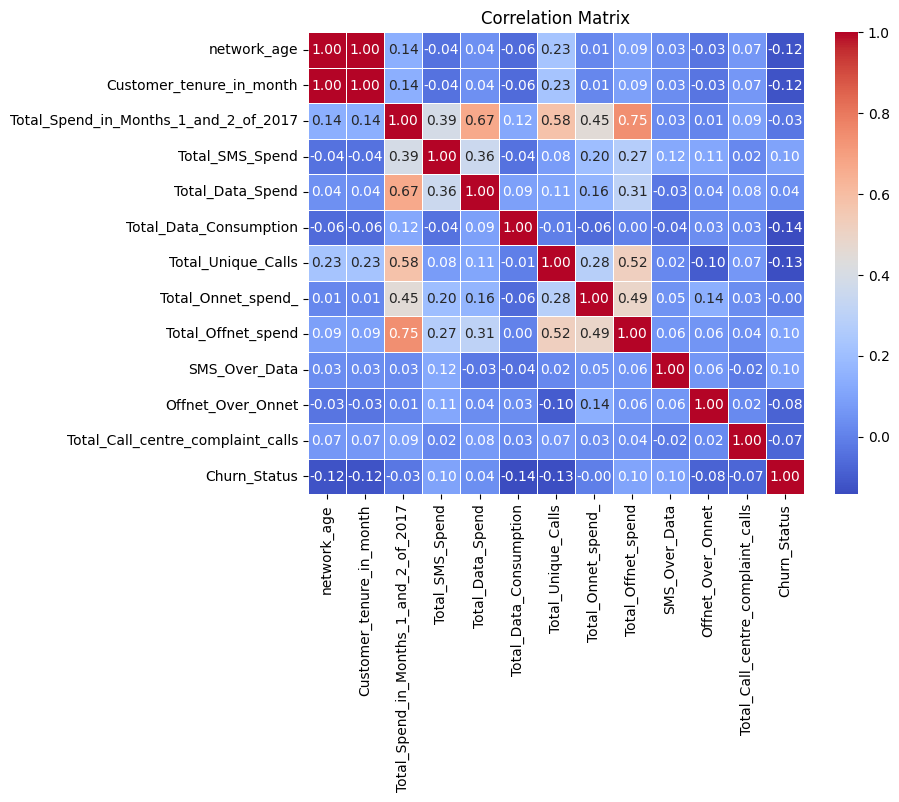

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
## there are some colinearilty:  Total_Spend_in_Months_1_and_2_of_2017 and  Total_Offnet_spend are collinear with correlation of 0.75
## Total_Spend_in_Months_1_and_2_of_2017 is also colinear with Total data spend with a correlation of 0.67

## there is the big issure of two perfectly colinear variables: customer tenure in month, and network age
## i will drop network age. PCA is a candidate for addressing multicollinearilty; maybe i will use random forest. but for now, i will quickly iterate a one hidden layer neural network


In [18]:
train_df.drop("network_age", axis=1, inplace=True)
test_df.drop("network_age", axis=1, inplace=True)

In [19]:
print(train_df.shape)
print(test_df.shape)

(1400, 18)
(600, 14)


In [20]:
len(train_df.columns)

18

In [21]:
test_df.columns

Index(['Customer_ID', 'Customer_tenure_in_month',
       'Total_Spend_in_Months_1_and_2_of_2017', 'Total_SMS_Spend',
       'Total_Data_Spend', 'Total_Data_Consumption', 'Total_Unique_Calls',
       'Total_Onnet_spend', 'Total_Offnet_spend',
       'Total_Call_centre_complaint_calls',
       'Network_type_subscription_in_Month_1',
       'Network_type_subscription_in_Month_2',
       'Most_Loved_Competitor_network_in_Month_1',
       'Most_Loved_Competitor_network_in_Month_2'],
      dtype='object')

In [22]:
train_df.isna().sum()

Customer_tenure_in_month                      0
Total_Spend_in_Months_1_and_2_of_2017         0
Total_SMS_Spend                               0
Total_Data_Spend                              0
Total_Data_Consumption                        0
Total_Unique_Calls                            0
Total_Onnet_spend_                            0
Total_Offnet_spend                            0
SMS_Over_Data                                 0
Offnet_Over_Onnet                             0
Total_Call_centre_complaint_calls             0
Network_type_subscription_in_Month_1        175
Network_type_subscription_in_Month_2        144
Most_Loved_Competitor_network_in_Month_1      1
Most_Loved_Competitor_network_in_Month_2      1
Churn_Status                                  0
Consistent_competitor                         0
Network_Upgrade                               0
dtype: int64

In [23]:
## there are some nans, i will replace them with "unknown" in this first iteration
train_df["Network_type_subscription_in_Month_1"].fillna('unknown', inplace=True)
train_df["Network_type_subscription_in_Month_2"].fillna('unknown', inplace=True)

In [24]:
train_df.dropna(axis=0, inplace=True)

In [25]:
train_df.isna().sum()

Customer_tenure_in_month                    0
Total_Spend_in_Months_1_and_2_of_2017       0
Total_SMS_Spend                             0
Total_Data_Spend                            0
Total_Data_Consumption                      0
Total_Unique_Calls                          0
Total_Onnet_spend_                          0
Total_Offnet_spend                          0
SMS_Over_Data                               0
Offnet_Over_Onnet                           0
Total_Call_centre_complaint_calls           0
Network_type_subscription_in_Month_1        0
Network_type_subscription_in_Month_2        0
Most_Loved_Competitor_network_in_Month_1    0
Most_Loved_Competitor_network_in_Month_2    0
Churn_Status                                0
Consistent_competitor                       0
Network_Upgrade                             0
dtype: int64

In [26]:
# to ensure the type of value in our column
type(train_df["Most_Loved_Competitor_network_in_Month_1"].iloc[1])

str

In [27]:
train_df.to_csv("processed_train.csv")
test_df.to_csv("processed_test.csv")

In [28]:
## splitting the data into train,  eval and test

In [29]:
Y_all = train_df['Churn_Status']
X_all = train_df.drop('Churn_Status', axis=1)

numerical_features = list(numerical_features.columns)
numerical_features.remove('Churn_Status')
numerical_features.remove('network_age')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X_all, Y_all, test_size=0.3, random_state=19)


In [31]:
## spliting eval set into 2, one for test
X_eval, X_test,  y_eval, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=19)


In [32]:
#tranforming the dataset:
# for numerical data: standardize
# for categorical data: tokenize

In [33]:
## transforming  numerical data:
# numerical_features = ["Customer_tenure_in_month","Total_Spend_in_Months_1_and_2_of_2017","Total_SMS_Spend","Total_Data_Spend","Total_Data_Consumption","Total_Unique_Calls",
#                       "Total_Onnet_spend_","Total_Offnet_spend","Total_Call_centre_complaint_calls"]

from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()

scaler.fit(X_train[numerical_features])

StandardScaler()

In [34]:
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_eval[numerical_features] = scaler.transform(X_eval[numerical_features])


In [35]:
X_train.head(4)

,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Consistent_competitor,Network_Upgrade
70,1.577040,-0.537877,-0.025126,-0.125152,-0.313192,-0.660674,-0.379682,-0.399719,0.046583,1.089600,0.008275,2G,2G,Uxaa,PQza,no,same
524,0.114419,-0.323086,-0.274360,-0.184161,-0.313397,0.302678,-0.082514,-0.313092,0.383166,0.324845,-0.377493,3G,3G,Weematel,Uxaa,no,same
577,-1.014255,-0.121597,-0.235223,-0.192028,1.303718,-0.305926,-0.343681,-0.026998,-0.302087,0.768914,1.165579,3G,3G,Uxaa,Uxaa,yes,same
958,-0.160787,-0.140342,0.146593,-0.160557,-0.313347,-0.338472,-0.284880,0.225242,0.150831,0.666793,0.779811,Other,Other,Weematel,Mango,no,same


In [36]:
condition_column1 = X_train["Network_type_subscription_in_Month_1"] == 'unknown'
condition_column2 = X_train['Network_type_subscription_in_Month_2'] == 'unknown'


# Combine the conditions using the | (or) operator
selected_rows = X_train[condition_column1 | condition_column2]
selected_rows

,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Consistent_competitor,Network_Upgrade
1310,-0.475309,-0.293769,-0.210193,-0.184161,-0.313402,-0.325453,-0.088078,-0.214192,0.449863,0.397634,0.394043,unknown,unknown,ToCall,Uxaa,no,same
1349,-0.991555,0.091767,-0.460186,-0.192028,-0.140813,0.527243,-0.246589,-0.325265,0.026279,0.393916,-0.377493,unknown,unknown,Uxaa,Uxaa,yes,same
1328,2.669909,-0.158776,-0.407093,-0.192028,-0.306016,1.148865,-0.287390,-0.085894,-0.237259,0.593168,0.779811,unknown,unknown,Uxaa,Uxaa,yes,same
1234,-0.124280,-0.578066,-0.450781,-0.168425,1.391272,-0.647655,-0.380991,-0.372984,-0.228252,-1.851679,-0.377493,unknown,3G,PQza,PQza,yes,same
1384,-1.029935,0.201688,-0.460186,-0.192028,-0.312734,-0.065088,5.319525,-0.340997,0.026279,0.089245,-0.377493,unknown,3G,PQza,Uxaa,no,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,-0.121004,0.041772,1.627891,-0.176293,-0.313385,-0.400308,1.053793,0.276198,0.452061,0.363984,-0.377493,unknown,unknown,PQza,Uxaa,no,same
1316,1.850140,-0.257854,-0.340802,-0.054342,-0.285383,-0.361253,0.118762,-0.131598,-0.067671,0.378493,-0.377493,unknown,unknown,Weematel,Uxaa,no,same
365,0.019408,-0.377644,-0.460186,0.095146,0.596462,-0.637892,-0.380991,-0.348141,-0.392072,-1.950203,-0.377493,3G,unknown,Mango,PQza,no,same
1355,-0.442546,0.185031,-0.415436,-0.184161,-0.297264,0.263623,0.125634,-0.081065,0.063385,0.392917,-0.377493,unknown,unknown,Uxaa,Uxaa,yes,same


In [37]:
condition_column1 = X_eval['Network_type_subscription_in_Month_1'] == 'unknown'
condition_column2 = X_eval['Network_type_subscription_in_Month_2'] == 'unknown'

# Combine the conditions using the | (or) operator
selected_rows = X_eval[condition_column1 | condition_column2]
selected_rows

,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Consistent_competitor,Network_Upgrade
827,1.784615,0.283291,-0.159375,0.067609,-0.286834,-0.257107,-0.208843,-0.258527,-0.040600,0.429147,-0.377493,3G,unknown,Mango,Uxaa,no,same
1262,-0.716349,-0.540576,-0.278911,-0.188094,-0.313400,-0.631382,-0.232352,-0.373233,2.042700,0.289655,-0.377493,unknown,unknown,Uxaa,PQza,no,same
1364,-1.019638,-0.582431,-0.354000,-0.184161,-0.313402,-0.670437,-0.309644,-0.408631,0.257382,-1.048384,0.008275,unknown,3G,Uxaa,Uxaa,yes,same
1375,-1.025956,-0.476736,-0.433639,-0.050408,-0.253848,-0.530491,0.065415,-0.332309,-0.150048,0.266707,-0.377493,unknown,3G,Uxaa,Uxaa,yes,same
1397,-0.951772,0.216537,-0.159224,-0.148755,-0.313368,0.250605,-0.361354,1.616184,0.055222,1.150288,0.394043,unknown,unknown,Zintel,Zintel,yes,same
1226,-0.917605,-0.489533,-0.459882,-0.144822,4.124111,-0.654164,-0.380336,-0.380129,-0.448870,1.933270,0.008275,unknown,3G,Mango,Mango,yes,same
1303,-0.936327,-0.384023,-0.460186,0.040072,-0.305231,-0.628128,-0.335499,-0.379058,-0.402530,0.405330,0.008275,unknown,unknown,Uxaa,Uxaa,yes,same
1369,-1.036019,-0.542530,-0.380546,-0.172359,-0.312692,-0.660674,-0.214734,-0.401188,0.006629,0.111884,-0.377493,unknown,unknown,Uxaa,Uxaa,yes,same
1363,-1.004895,0.292196,-0.353848,-0.050408,-0.302499,0.774590,-0.227389,-0.294099,-0.074794,0.413233,0.008275,unknown,unknown,Uxaa,Uxaa,yes,same
1252,-0.841783,-0.567256,-0.133891,-0.192028,-0.313389,-0.670437,-0.380991,-0.404175,-0.318799,-1.464266,-0.377493,unknown,unknown,PQza,PQza,yes,same


In [38]:
condition_column1 = X_test['Network_type_subscription_in_Month_1'] == 'unknown'
condition_column2 = X_test['Network_type_subscription_in_Month_2'] == 'unknown'

# Combine the conditions using the | (or) operator
selected_rows = X_test[condition_column1 | condition_column2]
selected_rows

,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Consistent_competitor,Network_Upgrade
1306,5.10,386.4600,21.87,27.50,2.885567e+06,54,7464,6753,0.930918,0.988775,1,unknown,unknown,Uxaa,Uxaa,yes,same
1307,59.03,396.2120,5.85,1.25,4.137700e+00,50,17497,2940,7.650627,0.817435,1,unknown,unknown,Zintel,Uxaa,no,same
1249,7.97,26.4520,13.70,1.25,6.953000e-01,5,12,827,11.328398,2.702542,1,unknown,unknown,Uxaa,PQza,no,same
1228,18.20,85.6500,13.70,0.00,4.848140e+01,17,420,5459,-0.568519,1.424607,1,unknown,unknown,ToCall,Mango,no,same
1362,5.47,1244.8544,1.75,36.25,8.571344e+06,328,7741,5151,0.157438,0.954509,1,unknown,unknown,ToCall,Uxaa,no,same
1337,4.20,718.6800,0.01,10.00,8.057959e+04,179,7008,14016,-1.698233,1.078279,1,unknown,3G,PQza,Uxaa,no,same
1247,3.30,16.1520,0.00,11.25,6.200622e+05,1,0,179,-1.901975,-1.126439,1,unknown,unknown,PQza,PQza,yes,same
1338,64.03,740.0680,3.50,45.00,1.540483e+03,111,23520,26018,0.329828,1.010028,1,unknown,unknown,ToCall,Uxaa,no,same
1320,138.47,517.2300,63.34,8.75,8.504761e+04,181,26352,7709,1.911659,0.879250,1,unknown,unknown,Uxaa,Uxaa,yes,same
1340,3.87,832.0504,145.25,26.25,1.949699e+06,127,1800,3094,1.523395,1.072266,2,unknown,3G,Zintel,Uxaa,no,same


In [39]:
#### transforming  categorical features:

label_encoders = {}

for col in categorical_features:
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  try:
     X_eval[col] = le.transform(X_eval[col])
  except:
    print(col)
  label_encoders[col] = le


In [40]:
X_eval

,Customer_tenure_in_month,Total_Spend_in_Months_1_and_2_of_2017,Total_SMS_Spend,Total_Data_Spend,Total_Data_Consumption,Total_Unique_Calls,Total_Onnet_spend_,Total_Offnet_spend,SMS_Over_Data,Offnet_Over_Onnet,Total_Call_centre_complaint_calls,Network_type_subscription_in_Month_1,Network_type_subscription_in_Month_2,Most_Loved_Competitor_network_in_Month_1,Most_Loved_Competitor_network_in_Month_2,Consistent_competitor,Network_Upgrade
827,1.784615,0.283291,-0.159375,0.067609,-0.286834,-0.257107,-0.208843,-0.258527,-0.040600,0.429147,-0.377493,1,3,1,3,0,1
1202,-0.574299,0.500166,2.055064,-0.160557,-0.264509,1.754214,0.497749,-0.109219,0.278639,0.334321,0.394043,2,2,5,3,0,1
483,-0.794277,-0.495915,-0.234161,-0.089747,-0.041116,-0.605346,-0.362991,-0.350008,-0.020085,0.650953,-0.377493,1,1,2,2,0,1
165,-1.025956,-0.002170,-0.407093,-0.144822,-0.304478,-0.556527,-0.166952,-0.345005,-0.084808,0.315754,-0.377493,0,0,1,3,0,1
576,-0.822360,-0.130186,-0.147998,-0.015003,-0.066762,-0.175743,0.245091,-0.257531,-0.025371,0.301730,-0.377493,1,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,-0.879226,0.408384,-0.261162,-0.192028,0.363694,-0.045561,-0.186588,-0.312196,-0.296582,0.368951,-0.377493,1,1,6,3,0,1
723,-0.557918,0.304168,-0.369472,0.103014,-0.057151,-0.120416,0.423675,0.075088,-0.099162,0.384830,0.008275,1,1,5,3,0,1
533,2.208189,-0.286542,-0.460186,-0.192028,-0.304812,-0.582564,-0.380991,-0.408631,0.026279,0.360201,0.008275,1,1,3,3,0,1
1270,-0.149086,-0.494938,-0.460186,-0.089747,-0.032603,-0.660674,-0.380991,-0.390808,-0.454707,-1.722540,-0.377493,3,1,2,1,1,1


In [41]:
from keras.src.backend import dropout
from keras.src.engine import input_layer
from keras.optimizers import Adam
from pandas.core.arrays import categorical

## the one where i build the first model iteration:

from keras.layers import Input, Embedding, Concatenate, Dense, Flatten, Dropout, LeakyReLU
from keras.models import Model

def create_model():

  cat_emb = []
  input_layers = []
  num_nos_featues = len(list(X_train[numerical_features]))
  num_input_layer = Input(shape=(num_nos_featues,))

  input_layers.append(num_input_layer)

  embedding_size =  8
  for col in categorical_features:
    cat_input_layer = Input(shape=(1,))
    embedding_layer = Embedding(input_dim=X_train[col].nunique(), output_dim=8)(cat_input_layer)

    flatten_layer = Flatten()(embedding_layer)

    cat_emb.append(flatten_layer)
    input_layers.append(cat_input_layer)

  concatenated = Concatenate()([num_input_layer] + cat_emb)

  dense_layer = Dense(32, activation=LeakyReLU(alpha=0.1))(concatenated)
  x = Dropout(0.3)(dense_layer)
  output_layer = Dense(1, activation='sigmoid')(x)

  model = Model(inputs=input_layers, outputs=output_layer)
  model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

  return model


In [42]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                              

In [43]:
##my custom call back:
from keras.callbacks import Callback
import os

class DynamicModelCheckpoint(Callback):
    def __init__(self, filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1):
        super().__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.save_best_only = save_best_only
        self.mode = mode
        self.verbose = verbose
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get(self.monitor)
        if current_val_accuracy is None:
            return

        if (self.save_best_only and
            ((self.mode == 'max' and current_val_accuracy > self.best_val_accuracy) or
             (self.mode == 'min' and current_val_accuracy < self.best_val_accuracy))):
            self.best_val_accuracy = current_val_accuracy
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Validation {self.monitor}: {current_val_accuracy:.4f} (improved)")

            # Change the filepath based on the validation accuracy
            self.filepath = f"model_{current_val_accuracy:.4f}.h5"
            self.model.save_weights(self.filepath, overwrite=True)
        elif not self.save_best_only:
            if self.verbose > 0:
                print(f"\nEpoch {epoch + 1}: Validation {self.monitor}: {current_val_accuracy:.4f}")




In [44]:

checkpoint = DynamicModelCheckpoint(filepath="model_checkpoint.h5", monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
## let's fit you babyyyyyyyyyy
history = model.fit(
    [X_train[numerical_features].values] + [X_train[col].values for col in categorical_features],
    y_train,
    epochs=1000,
    batch_size=32,
    callbacks = callbacks_list,
    validation_data=([X_eval[numerical_features].values] + [X_eval[col].values for col in categorical_features], y_eval)
)


Epoch 1/1000
21/31 [===================>..........] - ETA: 0s - loss: 0.6872 - accuracy: 0.5253  
Epoch 1: Validation val_accuracy: 0.6333 (improved)
31/31 [==============================] - 3s 20ms/step - loss: 0.6866 - accuracy: 0.5363 - val_loss: 0.6669 - val_accuracy: 0.6333
Epoch 2/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.6575 - accuracy: 0.6435
Epoch 2: Validation val_accuracy: 0.6571 (improved)
31/31 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.6394 - val_loss: 0.6453 - val_accuracy: 0.6571
Epoch 3/1000
14/31 [============>.................] - ETA: 0s - loss: 0.6652 - accuracy: 0.6317
Epoch 3: Validation val_accuracy: 0.6667 (improved)
31/31 [==============================] - 0s 7ms/step - loss: 0.6470 - accuracy: 0.6476 - val_loss: 0.6270 - val_accuracy: 0.6667
Epoch 4/1000
31/31 [==============================] - 0s 9ms/step - loss: 0.6159 - accuracy: 0.6782 - val_loss: 0.6107 - val_accuracy: 0.6667
Epoch 5/1000
31/31 [====

In [45]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
for col in categorical_features:
  le = label_encoders[col]
  X_test[col] = le.transform(X_test[col])

In [46]:
model.evaluate(
    [X_test[numerical_features].values] + [X_test[col].values for col in categorical_features],
    y_test
)

7/7 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.7476


[0.6871904730796814, 0.7476190328598022]

In [47]:
b_model = create_model()
b_model.load_weights("best_model.h5")

b_model.evaluate(
    [X_test[numerical_features].values] + [X_test[col].values for col in categorical_features],
    y_test
)

7/7 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7476


[0.5705053806304932, 0.7476190328598022]

In [48]:
b_model = create_model()
b_model.load_weights("/content/model_0.7571.h5")

b_model.evaluate(
    [X_test[numerical_features].values] + [X_test[col].values for col in categorical_features],
    y_test
)


7/7 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.7524


[0.6540424227714539, 0.7523809671401978]